<a href="https://colab.research.google.com/github/lima-breno/sampling_models/blob/main/Trabalho_regress%C3%A3o_log%C3%ADstica.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

-------------------------------------------------------------------------
*  PONTIFÍCIA UNIVERSIDADE CATÓLICA DE MINAS GERAIS
*  PROFESSOR: ANAÍLE MENDES RABELO
*  MATRÍCULA: 218150
*  NOME: BRENO LIMA MAIA DA SILVA
*  ATIVIDADE: TRABALHO FINAL
-------------------------------------------------------------------------

# Regressão Logística


## Conjunto de dados de previsão de doenças cardíacas

---

***Visão geral do conjunto de dados***

A Organização Mundial da Saúde estimou que 12 milhões de mortes ocorrem em todo o mundo, todos os anos, devido a doenças cardíacas. Metade das mortes nos Estados Unidos e em outros países desenvolvidos são devidas a doenças cardiovasculares. O prognóstico precoce das doenças cardiovasculares pode auxiliar na tomada de decisões sobre mudanças no estilo de vida em pacientes de alto risco e, por sua vez, reduzir as complicações. Esta pesquisa pretende identificar os fatores de risco/mais relevantes de doenças cardíacas, bem como prever o risco geral usando regressão logística
Preparação de Dados

Fonte
O conjunto de dados está disponível publicamente no site Kaggle e é proveniente de um estudo cardiovascular em andamento com residentes da cidade de Framingham, Massachusetts. O objetivo da classificação é prever se o paciente tem risco de doença coronariana (DCC) futura em 10 anos. O conjunto de dados fornece as informações dos pacientes. Inclui mais de 4.000 registros e 15 atributos.

---


**Apresentação das variáveis**

Cada atributo é um fator de risco potencial. Existem fatores de risco demográficos, comportamentais e médicos.

Demográfico:
- Sexo: masculino ou feminino (Nominal)
- Idade: Idade do paciente;(Contínuo - Embora as idades registradas tenham sido truncadas para números inteiros, o conceito de idade é contínuo)

Comportamental
- Fumante Atual: se o paciente é fumante atual ou não (Nominal)
- Cigarros por dia: o número de cigarros que a pessoa fumou em média em um dia. (pode ser considerado contínuo, pois pode-se fumar qualquer número de cigarros, até mesmo meio cigarro).
Médico (história)
- Medicamentos para PA: se o paciente estava ou não tomando medicação para pressão arterial (Nominal)
- AVC Prevalente: se o paciente já teve ou não um AVC (Nominal)
- Hip Prevalente: se o paciente era hipertenso ou não (Nominal)
- Diabetes: se o paciente tinha ou não diabetes (Nominal)
Médico (atual)
- Tot Chol: nível de colesterol total (Contínuo)
- PA Sist: pressão arterial sistólica (contínua)
- Dia BP: pressão arterial diastólica (contínua)
- IMC: Índice de Massa Corporal (Contínuo)
- Frequência cardíaca: frequência cardíaca (contínua - na pesquisa médica, variáveis ​​como a frequência cardíaca, embora na verdade sejam discretas, são consideradas contínuas devido ao grande número de valores possíveis.)
- Glicose: nível de glicose (contínuo)
Prever variável (alvo desejado)
- Risco de doença cardíaca coronária em 10 anos (binário: “1”, significa “Sim”, “0” significa “Não”)


## Objetivo da atividade:

Verificar como o sexo masculino, idade, número de cigarros fumado por dia e pressão arterial sistólica, colesterol e glicose podem influenciar as chances de ter uma doença cardíaca coronariana em 10 anos. ---- AJUSTAAAAAR!


## Importando bibliotecas

In [ ]:
import pandas as pd
import numpy as np
import sklearn
import seaborn as sns
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.stats.diagnostic import lilliefors
import scipy.stats as stats
from statsmodels.graphics.gofplots import qqplot
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.stats.diagnostic import het_breuschpagan
import warnings
warnings.filterwarnings("ignore")

## Importando dados

In [ ]:
data = pd.read_csv('/content/framingham.csv')

In [ ]:
data.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [ ]:
#Ajustando a coluna "male" para ficar como "Gender"
data.rename(columns={'male': 'Gender'}, inplace=True)

data.head()

,Gender,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [ ]:
# Ajustando os valores 1 e 0 para 'Male' e 'Female', respectivamente
for i in range(len(data)):
    if data.iloc[i, 0] == 1:  # Verifica se o valor é 1
        data.iloc[i, 0] = 'Male'
    elif data.iloc[i, 0] == 0:  # Verifica se o valor é 0
        data.iloc[i, 0] = 'Female'

data.head()

,Gender,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,Male,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,Female,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,Male,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,Female,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,Female,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [ ]:
data.dtypes

,0
Gender,object
age,int64
education,float64
currentSmoker,int64
cigsPerDay,float64
BPMeds,float64
prevalentStroke,int64
prevalentHyp,int64
diabetes,int64
totChol,float64


## Análise inicial

Verificar se existe uma tendência de risco de doença cardíaca coronariana entre pessoas do sexo masculino e feminino. Para isto, vamos verificar a contagem por categorias das variáveis.

In [ ]:
from collections import Counter
Counter(data.Gender)

Counter({'Male': 1819, 'Female': 2419})

Verificando Valores Missing (NaN)

In [ ]:
data.isnull().sum()

,0
Gender,0
age,0
education,105
currentSmoker,0
cigsPerDay,29
BPMeds,53
prevalentStroke,0
prevalentHyp,0
diabetes,0
totChol,50


Excluindo os valores NaN das variáveis que iremos utilizar

In [ ]:
data = data.dropna()

In [ ]:
data.isnull().sum()

,0
Gender,0
age,0
education,0
currentSmoker,0
cigsPerDay,0
BPMeds,0
prevalentStroke,0
prevalentHyp,0
diabetes,0
totChol,0


Verificando os dados via análise gráfica

In [ ]:
import plotly.express as px

px.pie(data, names="Gender")

Análisando a quantodade de pessoas com risco de doença cardíaca coronariana em 10 anos

In [ ]:
data.TenYearCHD.value_counts()

,count
TenYearCHD,
0,3099
1,557


In [ ]:
px.pie(data, names = 'TenYearCHD')

Verificamos que 84,8% das pessoas não tem possibilidade de desenvolver a doença cardíaca coronariana. Mas entre as pessoas que têm chances de desenvolver a doença, 55,6% são mulheres.

Renomeando a variável 'TenYearCHD'

In [ ]:
data['TenYearCHD'] = data['TenYearCHD'].replace({0:"no", 1:"yes"})

In [ ]:
data.head()

,Gender,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,Male,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,no
1,Female,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,no
2,Male,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,no
3,Female,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,yes
4,Female,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,no


Transformando em variáveis categóricas

In [ ]:
data['Gender'] = data['Gender'].astype('category')
data['TenYearCHD'] = data['TenYearCHD'].astype('category')

##Modelo 1: variável independente

Queremos entender se o risco de doença cardíaca coronariana está relacionado com o gênero.

Assim, temos o primeiro modelo com uma única variável independente.


**Pressupostos assumidos**
 - Variável dependente binária (dicotômica) -> Variável resposta (Y) dicotômica: TenYearCHD: Sim ou Não.
 - Categorias mutuamente exclusivas-> a mesma pessoa não está em duas situações
 - Independência das observaçoes (sem medidas repetidas) -> a mesma pessoa é analisada uma única vez

Criação do modelo de regressão logística

In [ ]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [ ]:
modelo1 = smf.glm(formula='TenYearCHD ~ Gender', data=data, family = sm.families.Binomial()).fit()
print(modelo1.summary())

                           Generalized Linear Model Regression Results                           
Dep. Variable:     ['TenYearCHD[no]', 'TenYearCHD[yes]']   No. Observations:                 3656
Model:                                               GLM   Df Residuals:                     3654
Model Family:                                   Binomial   Df Model:                            1
Link Function:                                     Logit   Scale:                          1.0000
Method:                                             IRLS   Log-Likelihood:                -1545.0
Date:                                   Mon, 13 Jan 2025   Deviance:                       3090.0
Time:                                           22:34:57   Pearson chi2:                 3.66e+03
No. Iterations:                                        5   Pseudo R-squ. (CS):           0.008326
Covariance Type:                               nonrobust                                         
                    

Deviance Residuals

In [ ]:
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
from scipy.stats import chi2, chisquare
from statsmodels.graphics.regressionplots import abline_plot
import scipy.stats as stats  # Importando o módulo stats da biblioteca SciPy

# Teste de Deviance para os Resíduos
deviance_test_statistic = modelo1.deviance
deviance_df = modelo1.df_resid
deviance_p_value = 1 - stats.chi2.cdf(deviance_test_statistic, deviance_df)

print("Teste de Deviance para os Resíduos:")
print("Estatística de teste:", deviance_test_statistic)
print("Graus de liberdade:", deviance_df)
print("Valor p:", deviance_p_value)

Teste de Deviance para os Resíduos:
Estatística de teste: 3089.958887368036
Graus de liberdade: 3654
Valor p: 0.9999999999983448


Aqui verificamos que o p-valor é maior que 0.05, tendo um bom indício de que é um bom modelo.

Testes de adequação do modelo

Pearson Chi-Square Test

In [ ]:
# Obtendo os resíduos de Pearson
residuos_pearson = modelo1.resid_pearson

# Teste de Pearson para os Resíduos
pearson_test_statistic = np.sum(residuos_pearson**2)
pearson_df = len(residuos_pearson) - modelo1.df_model - 1  # Graus de liberdade corrigidos
pearson_p_value = 1 - stats.chi2.cdf(pearson_test_statistic, pearson_df)


print("\nTeste de Pearson para os Resíduos:")
print("Estatística de teste:", pearson_test_statistic)
print("Graus de liberdade:", pearson_df)
print("Valor p:", pearson_p_value)


Teste de Pearson para os Resíduos:
Estatística de teste: 3656.000000000009
Graus de liberdade: 3654
Valor p: 0.4875592607481828


Aqui é possível confirmar o que o teste de deviance apresentou, demonstrando que o modelo propost é significativo

In [ ]:
modelo1.params

,0
Intercept,1.965152
Gender[T.Male],-0.510408


In [ ]:
razao = np.exp(modelo1.params[1])
razao

0.6002505075882617

Aqui conseguimos verificar que a chance de risco de desenvolvimento de doença coronariana em um homem é 60,02% menor quando comparado com uma mulher.

ROC Curve and AUC

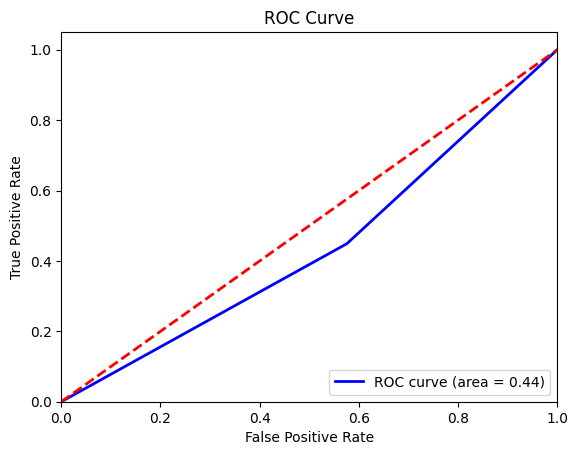

In [ ]:
from sklearn.metrics import roc_curve, auc

y = data["TenYearCHD"].replace({"no":0, "yes":1})

# ROC Curve
fpr, tpr, _ = roc_curve(y, modelo1.fittedvalues)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

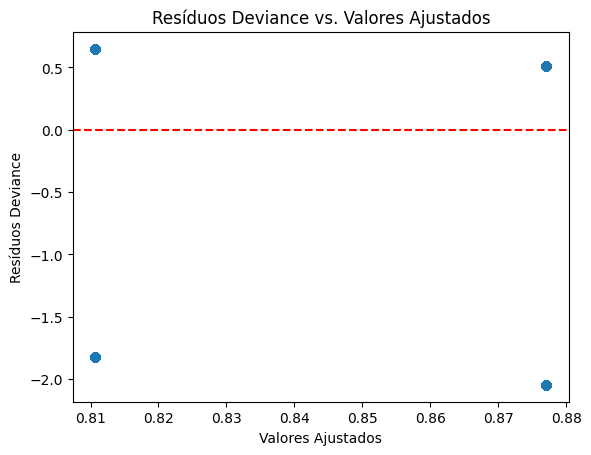

In [ ]:
# Resíduos deviance
residuos_deviance = modelo1.resid_deviance

# Resíduos de Pearson
residuos_pearson = modelo1.resid_pearson

import matplotlib.pyplot as plt
import statsmodels.api as sm

# Resíduos vs. valores ajustados
valores_ajustados = modelo1.fittedvalues
plt.scatter(valores_ajustados, residuos_deviance, alpha=0.7)
plt.axhline(0, color='red', linestyle='--')
plt.title("Resíduos Deviance vs. Valores Ajustados")
plt.xlabel("Valores Ajustados")
plt.ylabel("Resíduos Deviance")
plt.show()

Text(0.5, 1.0, 'Resíduos de Deviance vs. Índice')

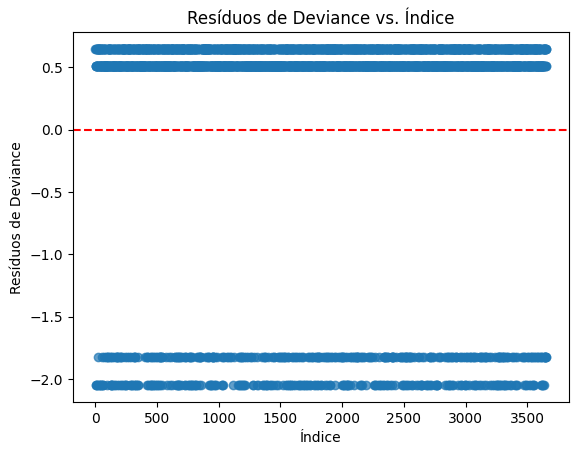

In [ ]:
plt.scatter(range(len(residuos_deviance)), residuos_deviance, alpha=0.7)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Índice')
plt.ylabel('Resíduos de Deviance')
plt.title('Resíduos de Deviance vs. Índice')

##Modelo 2: Mais de uma variável independente

Agora queremos modelar o risco de doença cardíaca coronariana com relação a pessoa que é fumante e o seu gênero


In [ ]:
data['currentSmoker'].value_counts()

,count
currentSmoker,
0,1868
1,1788


In [ ]:
px.pie(data, names = 'currentSmoker')

Ajustando o dado para categoria

In [ ]:
data['currentSmoker'] = data['currentSmoker'].astype('category')

In [ ]:
data.dtypes

,0
Gender,category
age,int64
education,float64
currentSmoker,category
cigsPerDay,float64
BPMeds,float64
prevalentStroke,int64
prevalentHyp,int64
diabetes,int64
totChol,float64


**Criação do modelo 2**

In [ ]:
modelo2 = smf.glm(formula='TenYearCHD ~ Gender + currentSmoker', data=data, family = sm.families.Binomial()).fit()
print(modelo2.summary())

                           Generalized Linear Model Regression Results                           
Dep. Variable:     ['TenYearCHD[no]', 'TenYearCHD[yes]']   No. Observations:                 3656
Model:                                               GLM   Df Residuals:                     3653
Model Family:                                   Binomial   Df Model:                            2
Link Function:                                     Logit   Scale:                          1.0000
Method:                                             IRLS   Log-Likelihood:                -1545.0
Date:                                   Mon, 13 Jan 2025   Deviance:                       3090.0
Time:                                           22:39:54   Pearson chi2:                 3.66e+03
No. Iterations:                                        5   Pseudo R-squ. (CS):           0.008326
Covariance Type:                               nonrobust                                         
                    

Verificamos que o p-valor para o fumante atual é maior que 0.05, demonstrando que não há influência de ser fumante no risco de desenvolvimento de doença coronariana. Podendo ser descartada essa hipótese.

## Modelo 3: Variável independente numérica
Avaliando o risco da pessoa desenvolver doença cardíaca coronariana em relação a sua idade.

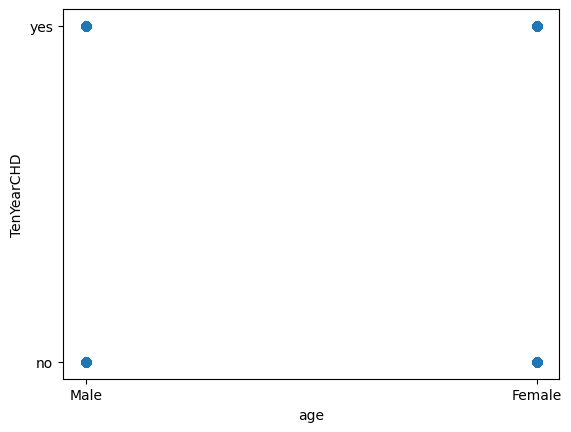

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(data.Gender,data.TenYearCHD)
plt.xlabel('age')
plt.ylabel('TenYearCHD')
plt.grid(False)
plt.show()

**Criando o modelo 3**

In [ ]:
modelo3 = smf.glm(formula='TenYearCHD ~ age', data=data, family = sm.families.Binomial()).fit()
print(modelo3.summary())

                           Generalized Linear Model Regression Results                           
Dep. Variable:     ['TenYearCHD[no]', 'TenYearCHD[yes]']   No. Observations:                 3656
Model:                                               GLM   Df Residuals:                     3654
Model Family:                                   Binomial   Df Model:                            1
Link Function:                                     Logit   Scale:                          1.0000
Method:                                             IRLS   Log-Likelihood:                -1460.1
Date:                                   Mon, 13 Jan 2025   Deviance:                       2920.3
Time:                                           22:40:27   Pearson chi2:                 3.60e+03
No. Iterations:                                        5   Pseudo R-squ. (CS):            0.05330
Covariance Type:                               nonrobust                                         
                 coe

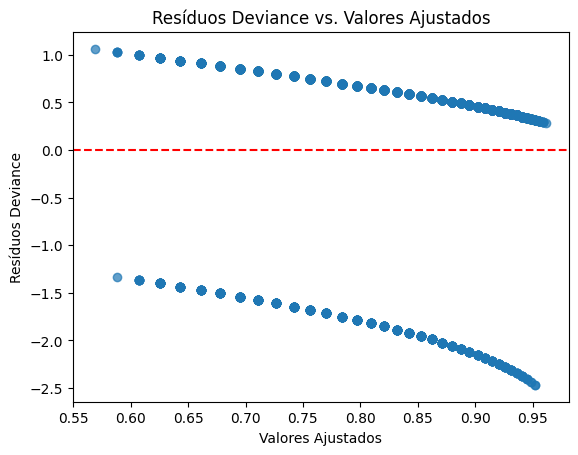

In [ ]:
# Resíduos deviance
residuos_deviance = modelo3.resid_deviance

# Resíduos de Pearson
residuos_pearson = modelo3.resid_pearson


# Resíduos vs. valores ajustados
valores_ajustados = modelo3.fittedvalues
plt.scatter(valores_ajustados, residuos_deviance, alpha=0.7)
plt.axhline(0, color='red', linestyle='--')
plt.title("Resíduos Deviance vs. Valores Ajustados")
plt.xlabel("Valores Ajustados")
plt.ylabel("Resíduos Deviance")
plt.show()

Text(0.5, 1.0, 'Resíduos de Deviance vs. Índice')

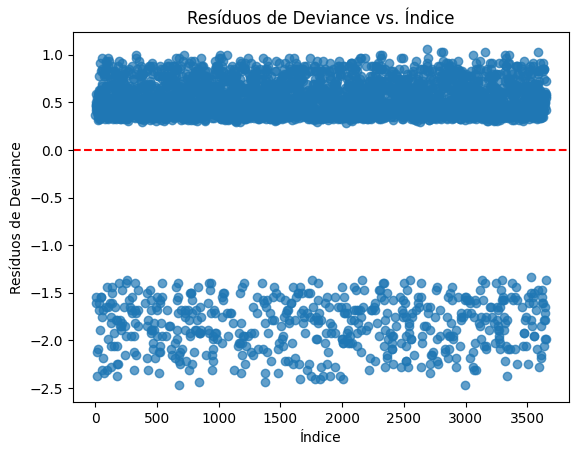

In [ ]:
plt.scatter(range(len(residuos_deviance)), residuos_deviance, alpha=0.7)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Índice')
plt.ylabel('Resíduos de Deviance')
plt.title('Resíduos de Deviance vs. Índice')

Deviance residuals

In [ ]:
deviance_test_statistic = modelo3.deviance
deviance_df = modelo3.df_resid
deviance_p_value = 1 - stats.chi2.cdf(deviance_test_statistic, deviance_df)

print("Teste de Deviance para os Resíduos:")
print("Estatística de teste:", deviance_test_statistic)
print("Graus de liberdade:", deviance_df)
print("Valor p:", deviance_p_value)

Teste de Deviance para os Resíduos:
Estatística de teste: 2920.292097952226
Graus de liberdade: 3654
Valor p: 1.0


Pearson Chi-Square Test

In [ ]:
# Obtendo os resíduos de Pearson
residuos_pearson = modelo3.resid_pearson

# Teste de Pearson para os Resíduos
pearson_test_statistic = np.sum(residuos_pearson**2)
pearson_df = len(residuos_pearson) - modelo3.df_model - 1  # Graus de liberdade corrigidos
pearson_p_value = 1 - stats.chi2.cdf(pearson_test_statistic, pearson_df)

print("\nTeste de Pearson para os Resíduos:")
print("Estatística de teste:", pearson_test_statistic)
print("Graus de liberdade:", pearson_df)
print("Valor p:", pearson_p_value)


Teste de Pearson para os Resíduos:
Estatística de teste: 3604.3992141007993
Graus de liberdade: 3654
Valor p: 0.7173727328242023


Interpretação dos coeeficientes

In [ ]:
# Razão de chance com Intervalo de confiança de 95%
np.exp(modelo3.params[1])

0.9252662616048403

In [ ]:
modelo1.aic

3093.958887368036

In [ ]:
modelo2.aic

3095.9587248813036

In [ ]:
modelo3.aic

2924.292097952227

È possivel verificar que entre os AICs encontrados para os três modelos o modelo 3 é o que apresenta o menor valor, podendo ser considerado como o melhor ajuste do modelo dos dados. Em relação às chances da idade influenciar no risco, vemos que é de baixa, representando 92,52%.

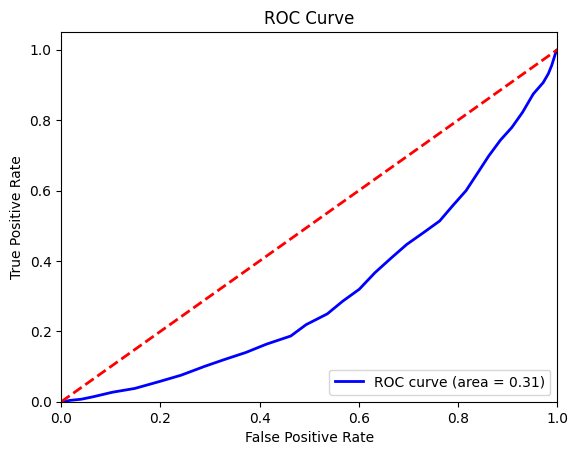

In [ ]:
# ROC Curve
fpr, tpr, _ = roc_curve(y, modelo3.fittedvalues)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

Aqui é possível verificar que o modelo 3 indica uma discriminação aleatória.

##Conclusão

É possível verificar que o modelo de regressão logística que, em termos de percentual, as mulheres em chances maiores de desenvolver doenças cardíacas coronarianas quando comparado com os homens. Vale salientar que a amostra que representa a população feminina está desbalanceada, o que pode influenciar negativamente o resultado avaliado.